# Avito: O que é? 

# Importando libs

In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
import scipy as sp


# Carregando o dataset

In [2]:
df = pd.read_csv('train.csv.zip', compression='zip')

## Limpesa dos dados

In [15]:
# transformando descrições nulas em str vazias
df['description'] = df['description'].replace(np.nan, '', regex=True)

## Sobre os dados

* title
* description
* user_type
* price
* category_name
* item_seq_number
* region
* deal_probability


Uma olhada nos dados:

In [28]:
df.head(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


Agrupando pelas categorias

In [7]:
group_category = df.groupby('category_name')
group_category.count().head()

,item_id,user_id,region,city,parent_category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
category_name,,,,,,,,,,,,,,,,,
Автомобили,62494,62494,62494,62494,62494,62055,62055,61937,62494,62494,61287,62494,62494,62494,58949,58949,62494
Аквариум,4840,4840,4840,4840,4840,0,0,0,4840,4504,4302,4840,4840,4840,4519,4519,4840
Аудио и видео,27036,27036,27036,27036,27036,26857,0,0,27036,24880,26186,27036,27036,27036,25893,25893,27036
Билеты и путешествия,3108,3108,3108,3108,3108,3047,0,0,3108,3015,2984,3108,3108,3108,2868,2868,3108
Бытовая техника,33705,33705,33705,33705,33705,33528,31507,0,33705,31313,32810,33705,33705,33705,31852,31852,33705


Conferindo comportamento de items com preço 0
grande parte é proximo de 0
E alguns tmb são muito vendidos (vi que tem muitas coisas de troca, ou adoção de animal abandonado por exemplo)

(2369, 18)
(2277, 18)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3af88ab6d8>]],
      dtype=object)

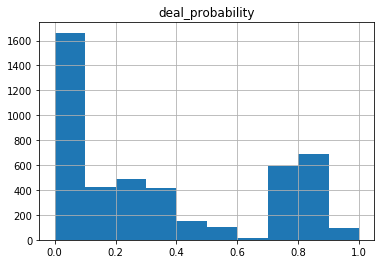

In [26]:
free_price = df[(df['price'] == 0)]
print(free_price[(free_price['deal_probability'] < 0.25)].shape)
print(free_price[(free_price['deal_probability'] >= 0.25)].shape)
free_price.hist(column='deal_probability')

# Testando montar um bag of words

In [61]:
from sklearn.feature_extraction.text import CountVectorizer


def convert_deal_probability_to_class(value):
    classes = [

    ]
    if value * 100 <= (100 / 3 * 1):
        return 'low'
    elif value * 100 <= (100 / 3 * 2):
        return 'average'
    else:
        return 'high'

df['deal_prob_class'] = df['deal_probability'].apply(convert_deal_probability_to_class)

def prepare_vectorizer_and_col(df, col_name):
    vectorizer = CountVectorizer(lowercase=True)
    corpus = df[col_name]
    col_vectorized = vectorizer.fit_transform(corpus)
    return col_vectorized, vectorizer

    

description_vectorized, vectorizer_description = prepare_vectorizer_and_col(df, 'description')

In [71]:
from sklearn.naive_bayes import MultinomialNB

def get_multinomial_NB(X, y):
    classifier = MultinomialNB()
    classifier.fit(X, y)
    return classifier


In [72]:
model_description_multinomial_nb = get_multinomial_NB(description_vectorized, df['deal_prob_class'])

In [57]:
# # vectorizer.transform(['Кокон']).toarray().
# print(vectorizer.vocabulary_.get('BLUESKAY'))
# corpus[corpus.str.contains("blueskay")]
# # vectorizer.get_feature_names()[100000]
# df[df['description'] == corpus[33135]]
# vectorizer.transform(None).toarray()


In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gaussian_description = gnb.fit(X, ).predict(iris.data)
